In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\BreadBasket_DMS.csv")

In [3]:
# Data Exploration
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [4]:
df.tail()

,Date,Time,Transaction,Item
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies


In [5]:
# Data is from 2016-10-30 at around 10am(opening?) to 2017-04-09 at around 3:00pm

In [6]:
summary = pd.get_dummies(df['Item'])

In [7]:
top_sorted = summary.sum().sort_values(ascending=False)[:10]
    

In [8]:
df = pd.concat([df, summary], axis=1)

In [9]:
# Convert the Date/Time to datetime data for easier analysis
# Added some features for Year/Month/Day/Weekday

from datetime import datetime
df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Weekday'] = df['DateTime'].dt.weekday

df = df.drop(columns=['Date', 'Time'])

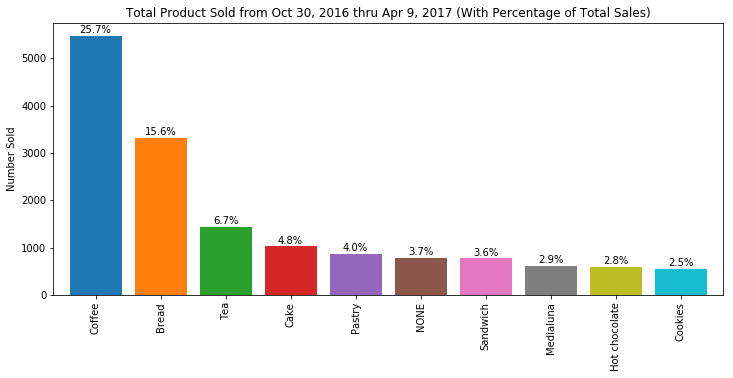

In [10]:
plt.figure(figsize=(12,5))
ax = top_sorted.plot(kind='bar', width=0.8)
ax.set_title('Total Product Sold from Oct 30, 2016 thru Apr 9, 2017 (With Percentage of Total Sales)')
ax.set_ylabel('Number Sold')

def add_value_labels(ax, spacing=1):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # Use Y value as label and format number with one decimal place
        label = "{:.1%}".format(y_value/len(summary))

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
add_value_labels(ax)
plt.show()

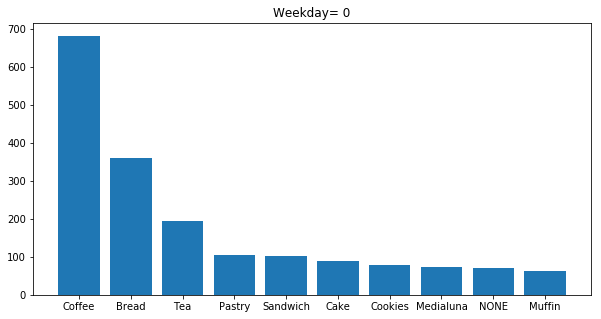

Coffee       681
Bread        360
Tea          193
Pastry       105
Sandwich     101
Cake          89
Cookies       79
Medialuna     72
NONE          70
Muffin        63
dtype: int64


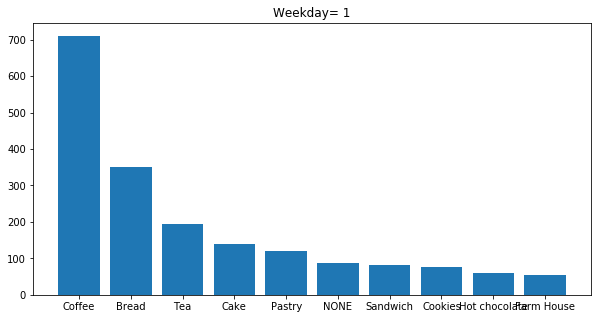

Coffee           710
Bread            350
Tea              194
Cake             139
Pastry           119
NONE              88
Sandwich          82
Cookies           77
Hot chocolate     59
Farm House        55
dtype: int64


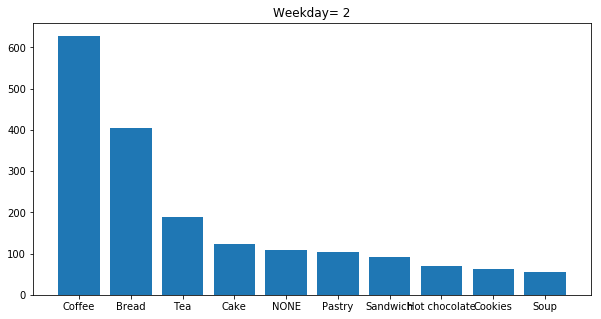

Coffee           628
Bread            405
Tea              188
Cake             123
NONE             108
Pastry           103
Sandwich          92
Hot chocolate     69
Cookies           63
Soup              56
dtype: int64


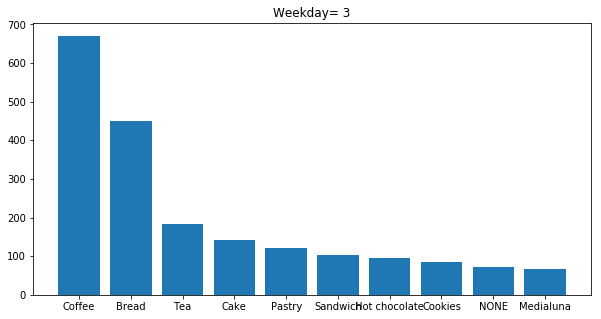

Coffee           670
Bread            450
Tea              183
Cake             141
Pastry           121
Sandwich         103
Hot chocolate     94
Cookies           85
NONE              73
Medialuna         67
dtype: int64


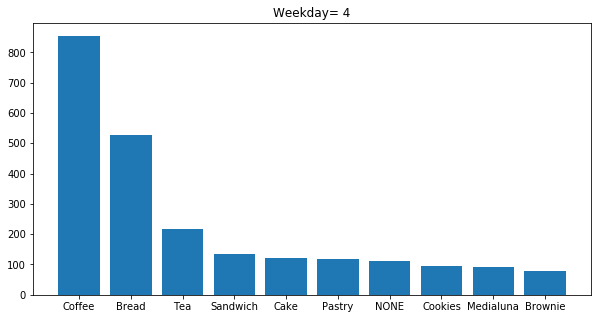

Coffee       854
Bread        527
Tea          218
Sandwich     134
Cake         120
Pastry       118
NONE         111
Cookies       94
Medialuna     93
Brownie       78
dtype: int64


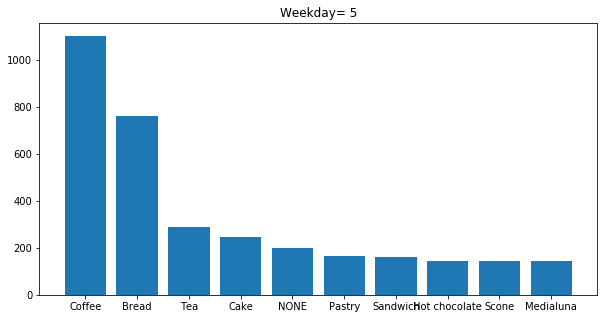

Coffee           1103
Bread             760
Tea               288
Cake              246
NONE              198
Pastry            166
Sandwich          161
Hot chocolate     146
Scone             146
Medialuna         143
dtype: int64


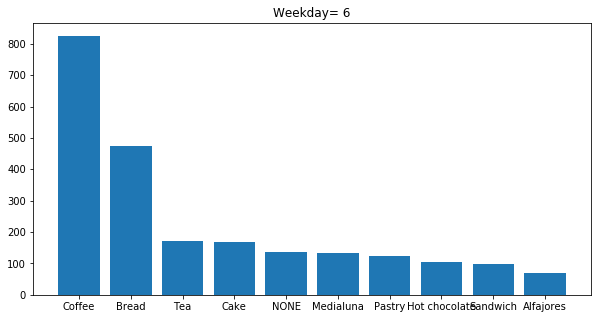

Coffee           825
Bread            473
Tea              171
Cake             167
NONE             138
Medialuna        134
Pastry           124
Hot chocolate    104
Sandwich          98
Alfajores         70
dtype: int64


In [11]:
# Plots to understand what is being bought throughout the week in the Bakery

for x in range(0,7):
    weekday = df.loc[df['Weekday']==x]
    weekday = weekday.drop(columns=['Transaction', 'Item', 'Month', 'Day', 'Weekday', 'Year'])
    top_10 = weekday.sum().sort_values(ascending=False)[:10]
    plt.figure(figsize=(10, 5))
    plt.title('Weekday= ' + str(x))
    plt.bar(top_10.index, top_10)
    plt.show()
    print(top_10)

In [12]:
top_10.index

Index(['Coffee', 'Bread', 'Tea', 'Cake', 'NONE', 'Medialuna', 'Pastry',
       'Hot chocolate', 'Sandwich', 'Alfajores'],
      dtype='object')

In [13]:
# Just by eyeballing this data it looks like coffee, bread and tea are most popular.
# Saturday is the busiest day
# There might be some patterns to how much the bakery is saleing each day, based on the day of the week

In [14]:
# Break out the baked items for analysis
baked_items=['Bread', 'Scandinavian', 'Cookies',
       'Muffin', 'Pastry', 'Medialuna',
       'Tartine', 'Fudge', 'Victorian Sponge', 'Frittata',
       'Cake', 'Focaccia', 'Alfajores',
       'Brownie', 'Empanadas', 'Bread Pudding', 'Kids biscuit', 'Tiffin',
       'Lemon and coconut', 'Toast', 'Scone', 'Vegan mincepie', 'Pintxos',
       'Panatone', 'Baguette']

In [15]:
# Created Bakery df to analyze the Bakery products being sold
df['Bakery_Item'] = ~df['Item'].isin(baked_items)
df['Bakery_Item'] = pd.get_dummies(df['Bakery_Item'])
Bakery = df.loc[df['Bakery_Item']==1]
Bakery = Bakery.drop(columns=['Transaction'])
Bakery['Item'] = Bakery.Item.astype('category')
# Bakery['Item'].cat.categories
Bakery['Item_codes'] = Bakery['Item'].cat.codes

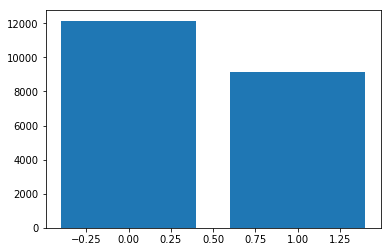

9142


In [16]:
vals, counts = np.unique(df['Bakery_Item'].values, return_counts=True)
plt.bar(vals, counts)
plt.show()
print(df['Bakery_Item'].sum())

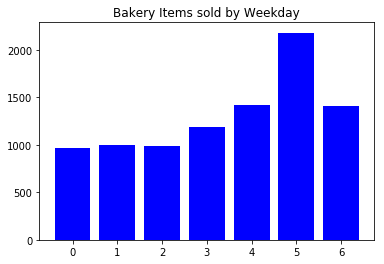

In [17]:
# Weekday analysis - 0 = Monday, 1 = Tuesday, etc.
vals, counts = np.unique(Bakery['Weekday'].values, return_counts=True)

plt.bar(vals,counts, color='b')
plt.title('Bakery Items sold by Weekday')
plt.show()

In [18]:
# Bakery Items sold almost double on Saturday vs any other day of the week

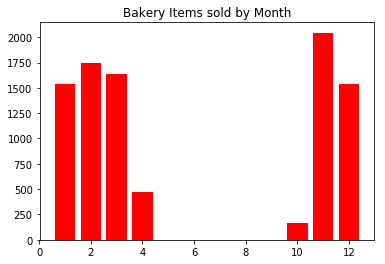

In [19]:
# Monthly Analysis
vals, counts = np.unique(Bakery['Month'].values, return_counts=True)

plt.bar(vals,counts, color='r')
plt.title('Bakery Items sold by Month')
plt.show()

In [20]:
# October and April have incomplete data for the month.  All other months with data are pretty consistant

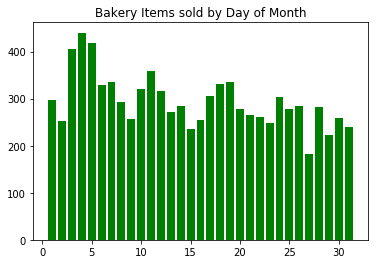

In [21]:
# Analysis by Day of Month
vals, counts = np.unique(Bakery['DateTime'].dt.day.values, return_counts=True)

plt.bar(vals,counts, color='g')
plt.title('Bakery Items sold by Day of Month')
plt.show()

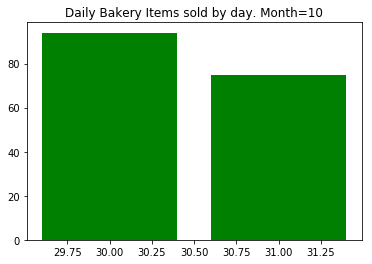

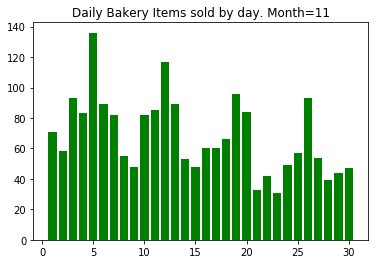

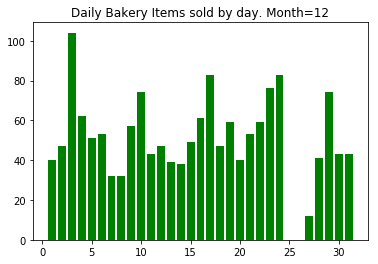

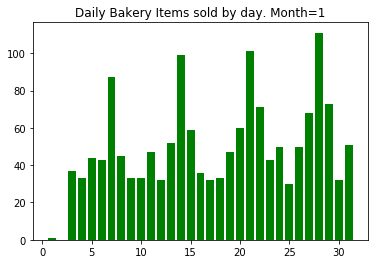

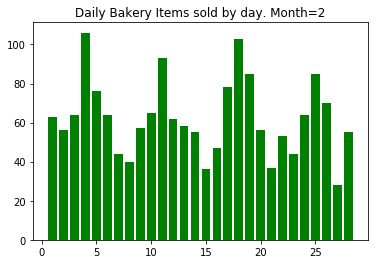

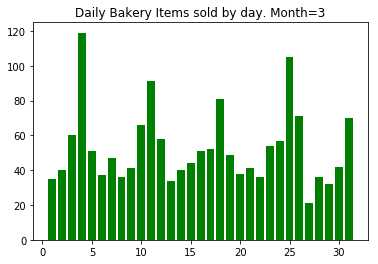

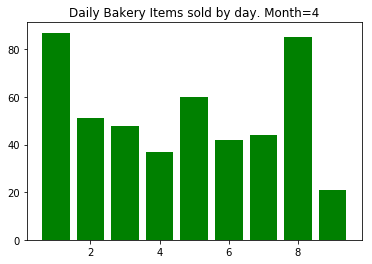

In [22]:
# Analysis of each day from the data
for m in [10, 11, 12, 1, 2, 3, 4]:
    month = Bakery.loc[Bakery['Month']==m]
    vals, counts = np.unique(month['DateTime'].dt.day.values, return_counts=True)

    plt.bar(vals,counts, color='g')
    plt.title('Daily Bakery Items sold by day. Month=' + str(m))
    plt.show()

In [23]:
# Store looks like it was closed Dec 25th-26th and Jan 1st-2nd.  Otherwise there is a pattern of weekends selling more bakery than weekdays
# Can really notice the peaks on the weekends.  There is some fluxations during the week... possibly weather related?  Bank holidays?

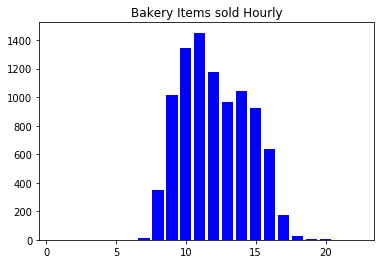

In [24]:
# Analysis of Bakery Sales by hour.  Not sure this is going to be relivant to our analysis
vals, counts = np.unique(Bakery['DateTime'].dt.hour.values, return_counts=True)

plt.bar(vals,counts, color='b')
plt.title('Bakery Items sold Hourly')
plt.show()

In [25]:
# This df is going to summarize the data and give the total of each Bakery product sold by day
bakery_summary = pd.pivot_table(Bakery, index=['Item', 'Item_codes', 'Year', 'Month', 'Day', 'Weekday'], 
                                values='Bakery_Item', 
                                aggfunc='sum').reset_index()


In [26]:
# Next, I created 2 new features: last week sold and 2wks sold.  
# This tells will be an input into the model with how much was sold in the on that day in the previous week & 2 weeks prior.

pd.options.mode.chained_assignment = 'warn'  # default='warn'

from datetime import timedelta
bakery_summary['finder'] =  None
bakery_summary['Last_Week_Sold'] = None
bakery_summary['2wks_Sold'] = None

for x in range(0, bakery_summary.shape[0]):
    
    item = bakery_summary.Item[x]
    datesold = datetime(bakery_summary.Year[x], bakery_summary.Month[x], bakery_summary.Day[x])
    # Created a finder as an unique identifer for each row
    bakery_summary.loc[x, 'finder'] = item + str(datesold)
    lastweek = datesold - timedelta(days=7)
    df_found = bakery_summary.loc[bakery_summary['finder']==item + str(lastweek)].reset_index()
    
    # Used Try/Except since python was had some warnings that weren't allowing this
    try:
        bakery_summary.loc[x, 'Last_Week_Sold'] = df_found['Bakery_Item'][0]
    except:
        bakery_summary.loc[x, 'Last_Week_Sold'] = 0
        
    last2weeks = datesold - timedelta(days=14)
    df_found = bakery_summary.loc[bakery_summary['finder']==item + str(last2weeks)].reset_index()
    
    try:
        bakery_summary.loc[x, '2wks_Sold'] = df_found['Bakery_Item'][0]
    except:
        bakery_summary.loc[x, '2wks_Sold'] = 0

In [27]:
# Test/Train split.  Used the month of March as my Test.  Did not randomize the days because I wanted to get data with a 
# good history and predict each weekday and each day of a month.

test = bakery_summary.loc[bakery_summary['Month'] == 3]
train = bakery_summary.loc[bakery_summary['Month'] != 3].sample(frac=1)

Xtr = train.drop(columns=['Bakery_Item', 'Item', 'finder'])
Ytr = train['Bakery_Item']

In [28]:
# Benchmark prediction
Ytr_bench = np.zeros_like(train['Bakery_Item'])

# Mean Squared Error
from sklearn.metrics import mean_squared_error

In [29]:
# MODELING
# First up was the linear regression

from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(Xtr,Ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
lm.score(Xtr,Ytr)

0.5921930497984473

In [31]:
mean_squared_error(Ytr, lm.predict(Xtr))

17.35134336945538

In [32]:
lm.score(Xtr,Ytr_bench)

0.0

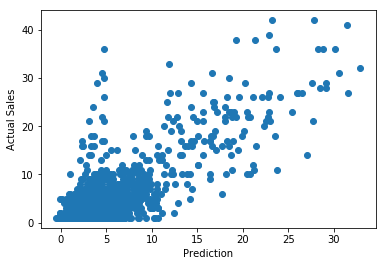

In [33]:
plt.scatter(x=lm.predict(Xtr), y=Ytr) 
plt.title='Prediction vs Sales'
plt.xlabel('Prediction')
plt.ylabel('Actual Sales')
plt.show()

In [34]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[300, 500, 700],
         'max_depth':[5, 10, 15]}

rfr = RandomForestRegressor(random_state=1)
regr = GridSearchCV(rfr, params, cv=5)
regr.fit(Xtr, Ytr)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300, 500, 700], 'max_depth': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
regr.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [36]:
regr.best_score_

0.6638269183886071

In [37]:
# initial training score
regr.score(Xtr,Ytr)

0.9526954608847612

In [38]:
mean_squared_error(Ytr, regr.predict(Xtr))

2.0127104276096177

In [39]:
regr.score(Xtr,Ytr_bench)

0.0

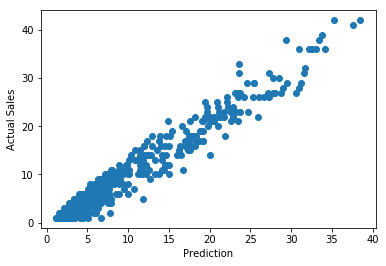

In [40]:
plt.scatter(x=regr.predict(Xtr), y=Ytr) 
plt.title='Prediction vs Sales'
plt.xlabel('Prediction')
plt.ylabel('Actual Sales')
plt.show()

In [41]:
# Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators':[10, 100, 500, 1000, 2000],
         'learning_rate':[0.01, 0.25, 0.5, 0.75, 1],
         'max_depth':[2, 5, 10, 20, 40]}

gbr = GradientBoostingRegressor(random_state=1)
regrboosted = GridSearchCV(gbr, params, cv=5)
regrboosted.fit(Xtr,Ytr)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500, 1000, 2000], 'learning_rate': [0.01, 0.25, 0.5, 0.75, 1], 'max_depth': [2, 5, 10, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
regrboosted.best_params_

{'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 100}

In [43]:
regrboosted.score(Xtr,Ytr)

0.7907354855972297

In [44]:
regrboosted.best_score_

0.671509420644437

In [45]:
mean_squared_error(Ytr, regrboosted.predict(Xtr))

8.903772833322797

In [46]:
regrboosted.score(Xtr,Ytr_bench)

0.0

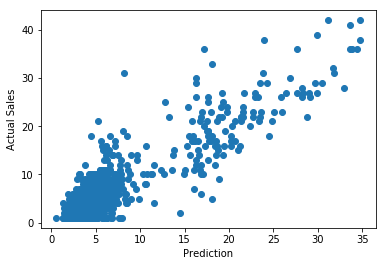

In [47]:
plt.scatter(x=regrboosted.predict(Xtr), y=Ytr) 
plt.title='Prediction vs Sales'
plt.xlabel('Prediction')
plt.ylabel('Actual Sales')
plt.show()

In [48]:
# TEST DATA

In [49]:
Xts = test.drop(columns=['Bakery_Item', 'Item', 'finder'])
Yts = test['Bakery_Item']

In [50]:
print(lm.score(Xts,Yts))
print(mean_squared_error(Yts, lm.predict(Xts)))

0.6519875839107196
12.88004676287374


In [51]:
print(regr.score(Xts,Yts))
print(mean_squared_error(Yts, regr.predict(Xts)))

0.7416675731787352
9.560962724303902


In [52]:
print(regrboosted.score(Xts,Yts))
print(mean_squared_error(Yts, regrboosted.predict(Xts)))

0.7303069983894099
9.981421098128399


In [53]:
td = pd.DataFrame()

In [54]:
td = td.assign(Item_codes=pd.Series(range(1,26)).values)




In [55]:
from datetime import date
today = date(2017, 4, 10)

td['Year'] = today.year
td['Month'] = today.month
td['Day'] = today.day
td['Weekday'] = today.weekday()
td['Last_Week_Sold'] =0
td['2wks_Sold']=0




In [56]:
td.head()

,Item_codes,Year,Month,Day,Weekday,Last_Week_Sold,2wks_Sold
0,1,2017,4,10,0,0,0
1,2,2017,4,10,0,0,0
2,3,2017,4,10,0,0,0
3,4,2017,4,10,0,0,0
4,5,2017,4,10,0,0,0


In [57]:
lw = date(2017, 4, 3)

one = bakery_summary.loc[bakery_summary['Year']== 2017]
two = one.loc[one['Month']==4]
three = two.loc[two['Day']==3]


In [58]:
for x in range(0, td.shape[0]):
    try:
        item = three.loc[three['Item_codes']==x]
        td['Last_Week_Sold'][x] = item['Bakery_Item']
        td['2wks_Sold'][x] = item['Last_Week_Sold']
    except:
        pass
    

In [59]:
pred = regr.predict(td)

In [60]:
tmrw_pred = td
tmrw_pred['pred'] = np.round_(pred)


In [61]:
tmrw_pred['Item_name'] = None
for y in range(0, tmrw_pred.shape[0]):
    item = Bakery.loc[Bakery['Item_codes']==y]
    tmrw_pred['Item_name'][y] = item['Item'][0]

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [62]:
tmrw_pred

,Item_codes,Year,Month,Day,Weekday,Last_Week_Sold,2wks_Sold,pred,Item_name
0,1,2017,4,10,0,3,0,3.0,Alfajores
1,2,2017,4,10,0,0,0,12.0,Baguette
2,3,2017,4,10,0,15,7,17.0,Bread
3,4,2017,4,10,0,0,0,4.0,Bread Pudding
4,5,2017,4,10,0,0,0,4.0,Brownie
5,6,2017,4,10,0,5,0,5.0,Cake
6,7,2017,4,10,0,7,1,4.0,Cookies
7,8,2017,4,10,0,0,0,2.0,Empanadas
8,9,2017,4,10,0,0,0,1.0,Focaccia
9,10,2017,4,10,0,0,0,1.0,Frittata
